<a href="https://colab.research.google.com/github/andremartins7/Gastos_dos_Senadores-2018_2021/blob/main/7DaysOfCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação das biliotecas iniciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

plt.style.use('fivethirtyeight')

In [2]:
# Carregando os dados
column_names = ['ANO','MES','SENADOR','TIPO_DESPESA','CNPJ_CPF','FORNECEDOR','DOCUMENTO','DATA','DETALHAMENTO','VALOR_REEMBOLSADO','COD_DOCUMENTO']

df_18 = pd.read_csv('despesa_ceaps_2018.csv', encoding = "ISO-8859-1", sep = ';', header=None, names=column_names)
df_18 = df_18.iloc[1: , :]

df_19 = pd.read_csv('despesa_ceaps_2019.csv', encoding = "ISO-8859-1", sep = ';', header=None, names=column_names)
df_19 = df_19.iloc[1: , :]

df_20 = pd.read_csv('despesa_ceaps_2020.csv', encoding = "ISO-8859-1", sep = ';', header=None, names=column_names)
df_20 = df_20.iloc[1: , :]

df_21 = pd.read_csv('despesa_ceaps_2021.csv', encoding = "ISO-8859-1", sep = ';', header=None, names=column_names)
df_21 = df_21.iloc[1: , :]

In [3]:
# Função para analisa o dataset
def load_info(data):
  print('\nA forma do conjunto de dados é:', data.shape)
  print('\nO cabeçalho do conjunto de dados é:\n', data.head(5))
  print('\nOs tipos de coluna são:\n', data.dtypes)  
  print('\nA descrição do conjunto de dados é:\n',data.describe())
  print('\nExistem valores nulos?\n', data.isnull().sum())

# **Analisando 2018**

In [4]:
df_18

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
1,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000,2088462
3,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....","274,99",2088476
4,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...","1094,29",2088528
5,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,V64HTR,24/01/2018,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...","1553,99",2088475
...,...,...,...,...,...,...,...,...,...,...,...
24489,2018,12,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",16.979.906/0001-30,Posto Vila da Serra Ltda,398003,13/12/2018,NaN,"220,05",2113727
24490,2018,12,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",16.979.906/0001-30,Posto Vila da Serra Ltda,401813,19/12/2018,NaN,"73,02",2113729
24491,2018,12,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",16.979.906/0001-30,Posto Vila da Serra Ltda,401714,19/12/2018,NaN,"232,01",2113732
24492,2018,12,ZEZÉ PERRELLA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens e Turismo Ltda,CI5PSK,05/12/2018,"Companhia Aérea: AZUL, Localizador: CI5PSK. Pa...","1132,69",2111612


In [5]:
# análise de 2018
load_info(df_18)


A forma do conjunto de dados é: (24493, 11)

O cabeçalho do conjunto de dados é:
     ANO  MES       SENADOR                                       TIPO_DESPESA  \
1   ANO  MES       SENADOR                                       TIPO_DESPESA   
2  2018    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
3  2018    1  ACIR GURGACZ  Passagens aéreas, aquáticas e terrestres nacio...   
4  2018    1  ACIR GURGACZ  Passagens aéreas, aquáticas e terrestres nacio...   
5  2018    1  ACIR GURGACZ  Passagens aéreas, aquáticas e terrestres nacio...   

             CNPJ_CPF                                FORNECEDOR  DOCUMENTO  \
1            CNPJ_CPF                                FORNECEDOR  DOCUMENTO   
2      004.948.028-63             GILBERTO PISELO DO NASCIMENTO        NaN   
3  63.764.211/0001-10  TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA     M2CJMM   
4  63.764.211/0001-10  TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA     SFEXYF   
5  63.764.211/0001-10  TRANSCONTINENTAL 

# **Analisando 2019**

In [6]:
df_19

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
1,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,006582758,04/01/2019,Despesa com pagamento de energia elétrica do e...,"66,02",2116543
3,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,006582755,04/01/2019,Despesa com pagamento de energia elétrica do e...,"139,98",2116546
4,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,00119,07/01/2019,Despesa com pagamento de aluguel de imóvel par...,6000,2113817
5,2019,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,86161151,25/12/2018,Despesa com pagamento de telefonia para o escr...,"316,39",2116541
...,...,...,...,...,...,...,...,...,...,...,...
21631,2019,1,ZEZÉ PERRELLA,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,Azul,O954UL,19/01/2019,"Companhia Aérea: AZUL, Localizador: O954UL. Pa...","769,29",2113825
21632,2019,1,ZEZÉ PERRELLA,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,Azul,G9Z36V,24/01/2019,"Companhia Aérea: AZUL, Localizador: G9Z36V. Pa...","310,62",2113828
21633,2019,1,ZEZÉ PERRELLA,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,GOL,WNQI4A,29/01/2019,"Companhia Aérea: GOL, Localizador: WNQI4A. Pas...","1168,1",2114101
21634,2019,1,ZEZÉ PERRELLA,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,NCCPIM,23/01/2019,"Companhia Aérea: LATAM, Localizador: NCCPIM. P...","772,05",2113826


In [7]:
# análise de 2019
load_info(df_19)


A forma do conjunto de dados é: (21635, 11)

O cabeçalho do conjunto de dados é:
     ANO  MES       SENADOR                                       TIPO_DESPESA  \
1   ANO  MES       SENADOR                                       TIPO_DESPESA   
2  2019    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
3  2019    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
4  2019    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
5  2019    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   

             CNPJ_CPF                     FORNECEDOR  DOCUMENTO        DATA  \
1            CNPJ_CPF                     FORNECEDOR  DOCUMENTO        DATA   
2  05.914.650/0001-66                       ENERGISA  006582758  04/01/2019   
3  05.914.650/0001-66                       ENERGISA  006582755  04/01/2019   
4      004.948.028-63  GILBERTO PISELO DO NASCIMENTO      00119  07/01/2019   
5  05.423.963/0001-11              

# **Analisando 2020**

In [8]:
df_20

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
1,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,14764742,06/01/2020,Despesa com energia elétrica para uso do escri...,"122,62",2141820
3,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,14764741,06/01/2020,Despesa com energia elétrica para uso do escri...,"137,75",2141818
4,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",062.135.728-64,FERNANDO WALDEIR PACINI e ANA LUCIA DA SILVA S...,001/2020,06/01/2020,Despesa com pagamento de aluguel de imóvel par...,1000,2139025
5,2020,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/20,02/01/2020,Despesa com pagamento de aluguel de imóvel par...,6000,2139020
...,...,...,...,...,...,...,...,...,...,...,...
14087,2020,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,TJ9NGF,08/12/2020,"Companhia Aérea: GOL, Localizador: TJ9NGF. Pas...","1654,46",2152858
14088,2020,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QN9KHE,09/12/2020,"Companhia Aérea: AZUL, Localizador: QN9KHE. Pa...","1121,83",2152859
14089,2020,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QIGVKT,14/12/2020,"Companhia Aérea: AZUL, Localizador: QIGVKT. Pa...","549,47",2153157
14090,2020,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,QDHKYF,14/12/2020,"Companhia Aérea: AZUL, Localizador: QDHKYF. Pa...","831,05",2153152


In [9]:
# análise de 2020
load_info(df_20)


A forma do conjunto de dados é: (14091, 11)

O cabeçalho do conjunto de dados é:
     ANO  MES       SENADOR                                       TIPO_DESPESA  \
1   ANO  MES       SENADOR                                       TIPO_DESPESA   
2  2020    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
3  2020    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
4  2020    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
5  2020    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   

             CNPJ_CPF                                         FORNECEDOR  \
1            CNPJ_CPF                                         FORNECEDOR   
2  05.914.650/0001-66                                           ENERGISA   
3  05.914.650/0001-66                                           ENERGISA   
4      062.135.728-64  FERNANDO WALDEIR PACINI e ANA LUCIA DA SILVA S...   
5      004.948.028-63                      GILBERT

# **Analisando 2021**

In [10]:
df_21

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
1,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2,2021,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,023.489.627,21/01/2021,Pagamento de energia elétrica para uso do escr...,"75,29",2158003
3,2021,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",062.135.728-64,FERNANDO WALDEIR PACINI e ANA LUCIA DA SILVA S...,01/2021,05/01/2021,Despesa com pagamento de aluguel de imóvel par...,1000,2157367
4,2021,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/21,06/01/2021,Despesa com aluguel de imóvel para uso do escr...,6000,2156383
5,2021,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,10,25/01/2021,Divulgação da atividade parlamentar,1500,2154509
...,...,...,...,...,...,...,...,...,...,...,...
16805,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,GDAONA,01/12/2021,"Companhia Aérea: GOL, Localizador: GDAONA. Pas...","1715,45",2170983
16806,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,JFQVZP,15/12/2021,"Companhia Aérea: LATAM, Localizador: JFQVZP. P...","2489,29",2172263
16807,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,SSKEOB,17/12/2021,"Companhia Aérea: GOL, Localizador: SSKEOB. Pas...","1486,66",2172717
16808,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,ZICCEX,27/12/2021,"Companhia Aérea: LATAM, Localizador: ZICCEX. P...","2515,56",2173239


In [11]:
# análise de 2021
load_info(df_21)


A forma do conjunto de dados é: (16809, 11)

O cabeçalho do conjunto de dados é:
     ANO  MES       SENADOR                                       TIPO_DESPESA  \
1   ANO  MES       SENADOR                                       TIPO_DESPESA   
2  2021    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
3  2021    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
4  2021    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
5  2021    1  ACIR GURGACZ                Divulgação da atividade parlamentar   

             CNPJ_CPF                                         FORNECEDOR  \
1            CNPJ_CPF                                         FORNECEDOR   
2  05.914.650/0001-66                                           ENERGISA   
3      062.135.728-64  FERNANDO WALDEIR PACINI e ANA LUCIA DA SILVA S...   
4      004.948.028-63                      GILBERTO PISELO DO NASCIMENTO   
5  26.320.603/0001-64                             

# **Unindo os 4 anos em um DataFrame**

In [12]:
df_ceaps_18_21 = pd.concat([df_18, df_19, df_20, df_21]) # atenção ao uso dos colchetes
df_ceaps_18_21

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
1,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000,2088462
3,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....","274,99",2088476
4,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...","1094,29",2088528
5,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,V64HTR,24/01/2018,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...","1553,99",2088475
...,...,...,...,...,...,...,...,...,...,...,...
16805,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,GDAONA,01/12/2021,"Companhia Aérea: GOL, Localizador: GDAONA. Pas...","1715,45",2170983
16806,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,JFQVZP,15/12/2021,"Companhia Aérea: LATAM, Localizador: JFQVZP. P...","2489,29",2172263
16807,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,SSKEOB,17/12/2021,"Companhia Aérea: GOL, Localizador: SSKEOB. Pas...","1486,66",2172717
16808,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,ZICCEX,27/12/2021,"Companhia Aérea: LATAM, Localizador: ZICCEX. P...","2515,56",2173239


In [13]:
df_ceaps_18_21 = df_ceaps_18_21.drop([1], axis=0)
df_ceaps_18_21

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000,2088462
3,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....","274,99",2088476
4,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...","1094,29",2088528
5,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,V64HTR,24/01/2018,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...","1553,99",2088475
6,2018,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,002/18,01/02/2018,Despesa com pagamento de aluguel de imóvel par...,6000,2088477
...,...,...,...,...,...,...,...,...,...,...,...
16805,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,GDAONA,01/12/2021,"Companhia Aérea: GOL, Localizador: GDAONA. Pas...","1715,45",2170983
16806,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,JFQVZP,15/12/2021,"Companhia Aérea: LATAM, Localizador: JFQVZP. P...","2489,29",2172263
16807,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,SSKEOB,17/12/2021,"Companhia Aérea: GOL, Localizador: SSKEOB. Pas...","1486,66",2172717
16808,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,ZICCEX,27/12/2021,"Companhia Aérea: LATAM, Localizador: ZICCEX. P...","2515,56",2173239


In [14]:
def formata_numeros(num, alphas=(), decimals=None):
    """
    Transforma em inteiro ou real dependendo do formato que o número apresentar.

    1. Parâmetros:
        - num: (str) string numérica a ser transformada
        - alphas: (iter) conjunto de caracteres que devem ser 
        removidos antes do número ser transformado em float.
        - decimal_houses: (int) representa a quantidade de casas decimais que o
        número terá ao ser retornado.
    
    2. Exemplos:
    In [1]: formata_numeros('123,456,789.1011')
    Out[1]: 123456789.1011

    In [2]: formata_numeros('R$ 123.456.789,1011')
    Out[2]: 123456789.1011

    In [3]: formata_numeros('98,99%')
    Out[3]: 0.9899
    >>> 
    """
    import re
    if num:
        num = str(num).strip()
        original = num
        percentage_pattern = re.compile("([0-9])+[,|.]([0-9])+%")
        percentage = bool(percentage_pattern.match(num))
        alphas = set((*alphas, *'%$R°º()'))
        num = ''.join([c for c in num if c not in alphas])
        num = re.split('\,|\.', num)
        try:
            if len(num) > 1: # É FLOAT
                num = float(''.join(num[:-1])+'.'+num[-1])
                if decimals and not percentage:
                    return format(num, f'.{decimals}f')
                elif decimals and percentage:
                    return format(num/100, f'.{decimals}f')
                elif not decimals and not percentage:
                    return num
                elif not decimals and percentage:
                    return num/100
            else: # É INTEIRO
                if percentage:
                    return int(''.join(num))/100
                else:
                    return int(''.join(num))
        except ValueError:
            num = ''.join(num[:-1]) + '.' + num[-1]
            raise ValueError(
                f"Não foi possível converter o número '{original}' para float")

In [15]:
df_ceaps_18_21['VALOR_REEMBOLSADO'] = df_ceaps_18_21['VALOR_REEMBOLSADO'].apply(formata_numeros)
df_ceaps_18_21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088462
3,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....",274.99,2088476
4,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...",1094.29,2088528
5,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,V64HTR,24/01/2018,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...",1553.99,2088475
6,2018,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,002/18,01/02/2018,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088477
...,...,...,...,...,...,...,...,...,...,...,...
16805,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,GDAONA,01/12/2021,"Companhia Aérea: GOL, Localizador: GDAONA. Pas...",1715.45,2170983
16806,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,JFQVZP,15/12/2021,"Companhia Aérea: LATAM, Localizador: JFQVZP. P...",2489.29,2172263
16807,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,SSKEOB,17/12/2021,"Companhia Aérea: GOL, Localizador: SSKEOB. Pas...",1486.66,2172717
16808,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,ZICCEX,27/12/2021,"Companhia Aérea: LATAM, Localizador: ZICCEX. P...",2515.56,2173239


In [16]:
# análise de df_ceaps_18_21
load_info(df_ceaps_18_21)


A forma do conjunto de dados é: (77024, 11)

O cabeçalho do conjunto de dados é:
     ANO MES       SENADOR                                       TIPO_DESPESA  \
2  2018   1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
3  2018   1  ACIR GURGACZ  Passagens aéreas, aquáticas e terrestres nacio...   
4  2018   1  ACIR GURGACZ  Passagens aéreas, aquáticas e terrestres nacio...   
5  2018   1  ACIR GURGACZ  Passagens aéreas, aquáticas e terrestres nacio...   
6  2018   2  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   

             CNPJ_CPF                                FORNECEDOR DOCUMENTO  \
2      004.948.028-63             GILBERTO PISELO DO NASCIMENTO       NaN   
3  63.764.211/0001-10  TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA    M2CJMM   
4  63.764.211/0001-10  TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA    SFEXYF   
5  63.764.211/0001-10  TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA    V64HTR   
6      004.948.028-63             GILBERTO PISELO D

In [17]:
df_ceaps_18_21['ANO'] = df_ceaps_18_21['ANO'].apply(formata_numeros)
df_ceaps_18_21['MES'] = df_ceaps_18_21['MES'].apply(formata_numeros)
df_ceaps_18_21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088462
3,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....",274.99,2088476
4,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...",1094.29,2088528
5,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,V64HTR,24/01/2018,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...",1553.99,2088475
6,2018,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,002/18,01/02/2018,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088477
...,...,...,...,...,...,...,...,...,...,...,...
16805,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,GDAONA,01/12/2021,"Companhia Aérea: GOL, Localizador: GDAONA. Pas...",1715.45,2170983
16806,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,JFQVZP,15/12/2021,"Companhia Aérea: LATAM, Localizador: JFQVZP. P...",2489.29,2172263
16807,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,SSKEOB,17/12/2021,"Companhia Aérea: GOL, Localizador: SSKEOB. Pas...",1486.66,2172717
16808,2021,12,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,ZICCEX,27/12/2021,"Companhia Aérea: LATAM, Localizador: ZICCEX. P...",2515.56,2173239


In [18]:
# análise de df_ceaps_18_21
load_info(df_ceaps_18_21)


A forma do conjunto de dados é: (77024, 11)

O cabeçalho do conjunto de dados é:
     ANO  MES       SENADOR                                       TIPO_DESPESA  \
2  2018    1  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   
3  2018    1  ACIR GURGACZ  Passagens aéreas, aquáticas e terrestres nacio...   
4  2018    1  ACIR GURGACZ  Passagens aéreas, aquáticas e terrestres nacio...   
5  2018    1  ACIR GURGACZ  Passagens aéreas, aquáticas e terrestres nacio...   
6  2018    2  ACIR GURGACZ  Aluguel de imóveis para escritório político, c...   

             CNPJ_CPF                                FORNECEDOR DOCUMENTO  \
2      004.948.028-63             GILBERTO PISELO DO NASCIMENTO       NaN   
3  63.764.211/0001-10  TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA    M2CJMM   
4  63.764.211/0001-10  TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA    SFEXYF   
5  63.764.211/0001-10  TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA    V64HTR   
6      004.948.028-63             GILBERTO PI

# **Analizando o Data Set Geral**

In [19]:
#Visualizando o tipo de variável de cada atributo
df_ceaps_18_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77024 entries, 2 to 16809
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                77024 non-null  int64  
 1   MES                77024 non-null  int64  
 2   SENADOR            77024 non-null  object 
 3   TIPO_DESPESA       77024 non-null  object 
 4   CNPJ_CPF           77024 non-null  object 
 5   FORNECEDOR         77024 non-null  object 
 6   DOCUMENTO          73979 non-null  object 
 7   DATA               77024 non-null  object 
 8   DETALHAMENTO       48395 non-null  object 
 9   VALOR_REEMBOLSADO  77024 non-null  float64
 10  COD_DOCUMENTO      77024 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 7.1+ MB


In [20]:
#Visualizando 10 linhas aleatórias da base de dados
df_ceaps_18_21.sample(10)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
16374,2019,10,ROBERTO ROCHA,"Aluguel de imóveis para escritório político, c...",06.272.793/0001-84,Equatorial Maranhão Distribuidora de Energia S.A.,0201910002372957,28/10/2019,Fatura de energia elétrica do escritório de ap...,2046.35,2134736
4297,2021,2,ESPERIDIÃO AMIN,"Aluguel de imóveis para escritório político, c...",26.167.898/0001-80,KHRONOS MONITORAMENTO ELETRONICO LTDA,236630,09/02/2021,NaN,231.45,2156344
22085,2018,2,VALDIR RAUPP,Divulgação da atividade parlamentar,04.769.344/0001-10,NOVA CLUBE FM E TEL. DE CACOAL LTDA,00004413,08/03/2018,Divulgação de atividade parlamentar,1414.00,2092786
20755,2018,6,RONALDO CAIADO,"Aluguel de imóveis para escritório político, c...",02.558.157/0001-62,VIVO,0631925478-0,09/06/2018,NaN,402.04,2100370
8233,2020,2,MARA GABRILLI,"Locomoção, hospedagem, alimentação, combustíve...",09.640.162/0001-69,CENTRO AUTOMOTIVO ALAMEDA CAMPINAS LTDA,000000865,17/02/2020,Aquisição de combustível para veículos utiliza...,683.67,2142185
2105,2019,10,CHICO RODRIGUES,"Locomoção, hospedagem, alimentação, combustíve...",04.062.881/0001-26,POLO MULTIMARCAS SERVIÇOS LTDA. ME,00000058,30/10/2019,NaN,8375.00,2134287
9329,2021,2,LUIS CARLOS HEINZE,"Locomoção, hospedagem, alimentação, combustíve...",96.735.022/0003-30,AUTO SERVICO LINDOLFO COLLOR LTDA,1888563,05/02/2021,NaN,188.19,2155207
3331,2018,6,CIRO NOGUEIRA,"Locomoção, hospedagem, alimentação, combustíve...",00.604.538/0001-05,Restaurante e Bar Xique Xique Ltda,000153479,18/06/2018,despesa com alimentação,114.00,2101966
11477,2020,7,ROGÉRIO CARVALHO,"Locomoção, hospedagem, alimentação, combustíve...",32.864.795/0022-05,Rede de Postos Presidente Ltda. (Farolândia),134871,23/07/2020,NaN,235.63,2147444
1488,2018,5,ANTONIO ANASTASIA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens e Turismo Ltda.,NJ5C7J,08/05/2018,"Companhia Aérea: GOL, Localizador: NJ5C7J. Pas...",605.87,2096801


In [21]:
#Excluindo o atributo "Documento" e "COD_DOCUMENTO"
df_ceaps_18_21.drop('DOCUMENTO', axis=1, inplace=True)
df_ceaps_18_21.drop('COD_DOCUMENTO', axis=1, inplace=True)  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
#Verificando a presença de valores nulos
df_ceaps_18_21.isnull().any()

ANO                  False
MES                  False
SENADOR              False
TIPO_DESPESA         False
CNPJ_CPF             False
FORNECEDOR           False
DATA                 False
DETALHAMENTO          True
VALOR_REEMBOLSADO    False
dtype: bool

In [23]:
#Tratando os valores nulos
df_ceaps_18_21.DETALHAMENTO = df_ceaps_18_21.DETALHAMENTO.fillna('Nao Informado')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
df_ceaps_18_21.isnull().any()

ANO                  False
MES                  False
SENADOR              False
TIPO_DESPESA         False
CNPJ_CPF             False
FORNECEDOR           False
DATA                 False
DETALHAMENTO         False
VALOR_REEMBOLSADO    False
dtype: bool

In [25]:
df_ceaps_18_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77024 entries, 2 to 16809
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                77024 non-null  int64  
 1   MES                77024 non-null  int64  
 2   SENADOR            77024 non-null  object 
 3   TIPO_DESPESA       77024 non-null  object 
 4   CNPJ_CPF           77024 non-null  object 
 5   FORNECEDOR         77024 non-null  object 
 6   DATA               77024 non-null  object 
 7   DETALHAMENTO       77024 non-null  object 
 8   VALOR_REEMBOLSADO  77024 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 5.9+ MB


In [26]:
#Verificando se há valores inconsistentes no atributo "VALOR_REEMBOLSADO"
df_ceaps_18_21[df_ceaps_18_21['VALOR_REEMBOLSADO']<0]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO


In [27]:
#Dados estatísticos dos valores reembolsados
df_ceaps_18_21['VALOR_REEMBOLSADO'].describe().round(2)

count     77024.00
mean       1249.98
std        2920.29
min           0.01
25%         141.90
50%         365.06
75%        1355.82
max      120000.00
Name: VALOR_REEMBOLSADO, dtype: float64

In [28]:
#Abreviando textos longos do atributo "TIPO_DESPESA"
df_ceaps_18_21['TIPO_DESPESA']=df_ceaps_18_21['TIPO_DESPESA'].replace(
    "Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles. ", 
    "Aluguel imóveis para escritório político e despesas concernentes")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
df_ceaps_18_21['TIPO_DESPESA']=df_ceaps_18_21['TIPO_DESPESA'].replace(
    "Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. " 
, "Material de consumo escritório, aquisição ou locação software, despesas postais, locação móveis e equiptos")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
df_ceaps_18_21['TIPO_DESPESA']=df_ceaps_18_21['TIPO_DESPESA'].replace(
    "Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar", 
    "Contratação consultorias, assessorias, pesquisas, trabalhos técnicos, outros serviços de apoio")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
df_ceaps_18_21['TIPO_DESPESA'].sample(10)

5872     Passagens aéreas, aquáticas e terrestres nacio...
17978    Locomoção, hospedagem, alimentação, combustíve...
16750    Aluguel de imóveis para escritório político, c...
16270    Material de consumo escritório, aquisição ou l...
7675                         Serviços de Segurança Privada
8735     Contratação consultorias, assessorias, pesquis...
10297    Material de consumo escritório, aquisição ou l...
8719     Aluguel de imóveis para escritório político, c...
11860    Locomoção, hospedagem, alimentação, combustíve...
1696     Locomoção, hospedagem, alimentação, combustíve...
Name: TIPO_DESPESA, dtype: object

In [32]:
#Qual o valor total de reembolsos CEAPS pagos no período 2018 - 2021?
df_ceaps_18_21['VALOR_REEMBOLSADO'].sum().round(2)

96278547.56

# **Criando gráficos**

In [33]:
#Importando os módulos para visualização de gráficos interativos
import pandas as pd
import numpy as np
# bibliotecas para trabalhar offline com a biblioteca
import plotly
import plotly.offline as py
import plotly.graph_objs as go # criará de fato os gráficos
from plotly.offline import plot, iplot
import cufflinks as cf # para conectar o plotly ao pandas

cf.go_offline()
plotly.offline.init_notebook_mode(connected = True)

In [35]:
#A última importação necessária é da plotly.io.
#Ela é quem nos permitirá renderizar gráficos no Colab.
#pio.renderers nos mostra todas as opções de renderização.
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [36]:
#Como estamos no ambiente colab escolheremos o renderers = 'colab'.
pio.renderers.default = 'colab'

In [37]:
#Qual o valor total de reembolsos CEAPS por ano no período 2018 a 2021?
ceaps_por_ano = df_ceaps_18_21.groupby('ANO')['VALOR_REEMBOLSADO'].sum()

data = [go.Bar(x=ceaps_por_ano.index,
               y=ceaps_por_ano.values,
               marker = {'color': '#feca57',
                         'line': {'color': '#ff9f43',
                                  'width': 2}}, opacity= 0.5)]

# Layout
config_layout = go.Layout(title='Total de Gastos dos Senadores - CEAPS 2018 a 2021',
                                yaxis={'title':'VALOR R$(milhões)','range':[0, 30000000]},
                                xaxis={'title':''})
                                 
# Objeto figura
fig = go.Figure(data=data, layout=config_layout)

# plotando grafico
py.iplot(fig)

In [38]:
#Agrupando por ano os 10 Senadores com maiores valores de reembolso CEAPS
top10_2018 = df_ceaps_18_21[df_ceaps_18_21['ANO']==2018].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2019 = df_ceaps_18_21[df_ceaps_18_21['ANO']==2019].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2020 = df_ceaps_18_21[df_ceaps_18_21['ANO']==2020].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)
top10_2021 = df_ceaps_18_21[df_ceaps_18_21['ANO']==2021].groupby(['ANO','SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)

In [39]:
#Concatenando os arquivos
top10_total = pd.concat([top10_2018, top10_2019, top10_2020, top10_2021], sort=False)

In [41]:
#Quem são os 10 Senadores que mais receberam CEAPS entre 2018 a 2021?
df_ceaps_18_21.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).to_frame().head(10)

,VALOR_REEMBOLSADO
SENADOR,
PAULO ROCHA,1849277.85
EDUARDO BRAGA,1779678.31
TELMÁRIO MOTA,1778568.04
WELLINGTON FAGUNDES,1675931.03
ROBERTO ROCHA,1672699.14
SÉRGIO PETECÃO,1644172.64
OMAR AZIZ,1618100.18
CIRO NOGUEIRA,1596974.41
FERNANDO COLLOR,1534838.30


In [42]:
#Quais foram os 10 maiores valores unitários de reembolso entre 2018 e 2021?
df_ceaps_18_21.nlargest(10, 'VALOR_REEMBOLSADO')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
13264,2020,12,WELLINGTON FAGUNDES,"Contratação consultorias, assessorias, pesquis...",23.721.017/0001-33,"T2 Comunicação, Video e Produções Eireli - EPP",21/12/2020,Despesa com serviço de consultoria e assessori...,120000.0
21227,2018,12,ROSE DE FREITAS,Divulgação da atividade parlamentar,05.461.408/0001-84,Grafitusa S/A,29/03/2019,Nao Informado,103900.0
21490,2018,11,SÉRGIO PETECÃO,"Contratação consultorias, assessorias, pesquis...",22.233.033/0001-14,Reis Grafica e Comercio de Etiquetas Eireli ME,29/11/2018,Nao Informado,102000.0
21493,2018,12,SÉRGIO PETECÃO,"Contratação consultorias, assessorias, pesquis...",22.233.033/0001-14,Reis Grafica e Comercio de Etiquetas Eireli ME,17/12/2018,Nao Informado,102000.0
22668,2018,12,VANESSA GRAZZIOTIN,"Contratação consultorias, assessorias, pesquis...",28.916.527/0001-80,A MAQUINA SOLUCOES EM MIDIA LTDA ME,17/12/2018,TRABALHOS TÉCNICOS DE APOIO AO EXERCICIO DO MA...,100000.0
11843,2020,12,SÉRGIO PETECÃO,"Contratação consultorias, assessorias, pesquis...",10.176.343/0001-65,"Mult Graf Industria Grafica, Editira e Comerci...",21/12/2020,Nao Informado,96250.0
11844,2020,12,SÉRGIO PETECÃO,"Contratação consultorias, assessorias, pesquis...",10.176.343/0001-65,"Mult Graf Industria Grafica, Editira e Comerci...",29/12/2020,Nao Informado,96250.0
17763,2019,11,ROSE DE FREITAS,"Contratação consultorias, assessorias, pesquis...",05.461.408/0001-84,Grafitusa S/A,06/11/2019,Nao Informado,79200.0
11586,2020,12,ROGÉRIO CARVALHO,Divulgação da atividade parlamentar,08.380.409/0001-92,LF Locações de Equipamentos e Filmagens Ltda. ME,02/12/2020,Nao Informado,72000.0
3630,2019,3,DAVI ALCOLUMBRE,"Locomoção, hospedagem, alimentação, combustíve...",06.180.439/0001-20,AEROTOP TÁXI AÉREO LTDA - EPP,12/03/2019,Nao Informado,66730.0


In [43]:
#Quantos reembolsos cada Senador solicitou entre 2018 a 2021?
df_ceaps_18_21.groupby('SENADOR')['ANO'].value_counts()

SENADOR          ANO 
ACIR GURGACZ     2020    233
                 2021    175
                 2019    149
                 2018    114
AIRTON SANDOVAL  2018    363
                        ... 
ZEZÉ PERRELLA    2019     10
ZÉ SANTANA       2019     11
                 2018      8
ÂNGELA PORTELA   2018    174
                 2019      5
Name: ANO, Length: 388, dtype: int64

In [44]:
#Quem são os 10 Senadores que mais receberam reembolso em 2021?
top10_2021

ANO   SENADOR         
2021  OMAR AZIZ           527681.31
      DAVI ALCOLUMBRE     512570.92
      ROGÉRIO CARVALHO    502132.23
      LUCAS BARRETO       499101.15
      MECIAS DE JESUS     488693.40
      TELMÁRIO MOTA       488402.25
      PAULO ROCHA         483888.13
      ZEQUINHA MARINHO    470226.88
      MARCIO BITTAR       465838.31
      MAILZA GOMES        462275.83
Name: VALOR_REEMBOLSADO, dtype: float64

In [45]:
#Gráfico dos 10 Senadores que mais receberam reembolso em 2021
top10_2021 = top10_2021.groupby('SENADOR').sum().sort_values(ascending=False)

data = [go.Bar(x=top10_2021.index,
               y=top10_2021.values,
               marker = {'color': 'lightblue',
                         'line': {'color': '#0abde3',
                                  'width': 2}}, opacity= 0.5)]

# Layout
config_layout = go.Layout(title='Os 10 Senadores que mais receberam reembolso CEAPS em 2021',
                                 yaxis={'title':'VALOR R$(MIL)','range':[0, 600000]},
                                 xaxis={'title':''})

# Objeto figura
fig = go.Figure(data=data, layout=config_layout)

# plotando grafico
py.iplot(fig)

In [46]:
#Quais foram os 10 maiores valores de reembolso CEAPS em 2021?
df_ceaps_18_21[df_ceaps_18_21['ANO']==2021].nlargest(10, "VALOR_REEMBOLSADO")

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
14319,2021,12,SÉRGIO PETECÃO,"Contratação consultorias, assessorias, pesquis...",10.176.343/0001-65,"Mult Graf Industria Grafica, Editira e Comerci...",24/12/2021,Nao Informado,65000.0
14323,2021,12,SÉRGIO PETECÃO,Divulgação da atividade parlamentar,10.176.343/0001-65,"Mult Graf Industria Grafica, Editira e Comerci...",13/12/2021,Nao Informado,65000.0
11341,2021,12,MECIAS DE JESUS,Divulgação da atividade parlamentar,27.025.843/0001-07,F M HOLANDA EIRELI-ME,30/12/2021,Nao Informado,60300.0
2334,2021,3,CID GOMES,"Locomoção, hospedagem, alimentação, combustíve...",52.045.457/0001-16,TAM Aviação Executiva e Taxi Aéreo,30/03/2021,Nao Informado,54552.0
500,2021,12,ANGELO CORONEL,"Contratação consultorias, assessorias, pesquis...",30.727.829/0001-51,BUNKER BRAIN AUDIOVISUAL EIRELI,15/03/2022,Assessoria de comunicação - planejamento estra...,48000.0
11429,2021,8,NELSINHO TRAD,"Contratação consultorias, assessorias, pesquis...",37.195.146/0001-40,Home Mix Produção e Assessoria em Radiodifusão...,04/08/2021,"Referente ao pagamento no mês de agosto, da pr...",40000.0
11437,2021,9,NELSINHO TRAD,"Contratação consultorias, assessorias, pesquis...",37.195.146/0001-40,Home Mix Produção e Assessoria em Radiodifusão...,02/09/2021,"Referente ao pagamento no mês de setembro, da ...",40000.0
14312,2021,11,SÉRGIO PETECÃO,"Locomoção, hospedagem, alimentação, combustíve...",05.011.693/0001-31,ORTIZ TAXI AEREO LTDA,25/11/2021,Nao Informado,39000.0
10694,2021,11,MARCIO BITTAR,"Contratação consultorias, assessorias, pesquis...",02.456.658/0001-38,"IDÉIAS ESTRATÉGIA, PLANEJAMENTO E PROJETO LTDA",21/02/2022,Valor pago referente ao serviço de consultoria...,36000.0
10624,2021,2,MARCIO BITTAR,"Contratação consultorias, assessorias, pesquis...",02.456.658/0001-38,"IDÉIAS ESTRATÉGIA, PLANEJAMENTO E PROJETO LTDA",12/02/2021,Valor pago referente ao serviço de consultoria...,35000.0


In [47]:
#Quantos anos de mandato cada Senador exerceu?
df_mandato = df_ceaps_18_21[['SENADOR','ANO']].drop_duplicates()
df_mandato = df_mandato.groupby('SENADOR').count()
df_mandato.rename(columns={'ANO': 'ANOS_MANDATO'}).sample(20) #Exemplo com 20 candidatos aleatórios

,ANOS_MANDATO
SENADOR,
LUCAS BARRETO,3
NELSINHO TRAD,3
PRISCO BEZERRA,2
JAQUES WAGNER,3
ROMÁRIO,4
CARLOS VIANA,3
ANA AMÉLIA,2
SIQUEIRA CAMPOS,1
ROGÉRIO CARVALHO,3


In [48]:
#Quanto cada Senador recebeu por ano?
df_ceaps_18_21.groupby(['SENADOR','ANO'])[['VALOR_REEMBOLSADO']].sum().head(20) # Exemplo com os 20 primeiros em ordem alfabética

VALOR_REEMBOLSADO
SENADOR                ANO                    
ACIR GURGACZ           2018          317797.29
                       2019          251714.02
                       2020          415364.91
                       2021          415374.00
AIRTON SANDOVAL        2018          308350.35
ALESSANDRO VIEIRA      2019          448395.92
                       2020          292200.76
                       2021          424669.76
ALOYSIO NUNES FERREIRA 2019           18450.05
ALVARO DIAS            2018           44037.88
                       2019          105354.33
                       2020           17371.41
                       2021           27231.37
ANA AMÉLIA             2018          147226.50
                       2019           16596.83
ANGELO CORONEL         2019          339038.63
                       2020          398094.72
                       2021          422595.45
ANTONIO ANASTASIA      2018          277230.59
                       2019          305573.81

In [49]:
#Quais os 10 maiores valores totais de reembolso pago em cada ano aos Senadores?
top10_total.groupby(['SENADOR','ANO']).sum().sort_values(ascending=False)

SENADOR              ANO 
OMAR AZIZ            2019    531315.99
EDUARDO BRAGA        2018    529599.18
OMAR AZIZ            2021    527681.31
EDUARDO BRAGA        2019    519561.65
VANESSA GRAZZIOTIN   2018    515969.63
DAVI ALCOLUMBRE      2020    513609.00
JOÃO CAPIBERIBE      2018    513333.90
DAVI ALCOLUMBRE      2021    512570.92
ROGÉRIO CARVALHO     2021    502132.23
LUCAS BARRETO        2021    499101.15
MECIAS DE JESUS      2021    488693.40
TELMÁRIO MOTA        2020    488459.41
                     2021    488402.25
MECIAS DE JESUS      2020    487992.63
ROGÉRIO CARVALHO     2020    486526.49
TELMÁRIO MOTA        2019    485846.15
ÂNGELA PORTELA       2018    485806.44
PAULO ROCHA          2019    485114.40
OMAR AZIZ            2018    484143.98
PAULO ROCHA          2021    483888.13
                     2020    474301.41
ZEQUINHA MARINHO     2021    470226.88
MAILZA GOMES         2019    466253.40
MARCIO BITTAR        2021    465838.31
MAILZA GOMES         2021    462275.83

In [50]:
#Qual a quantidade total de reembolsos por tipo de despesa de 2018 a 2021?
df_ceaps_18_21['TIPO_DESPESA'].value_counts()

Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                              28885
Passagens aéreas, aquáticas e terrestres nacionais                                                            17326
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                      16926
Material de consumo escritório, aquisição ou locação software, despesas postais, locação móveis e equiptos     5542
Divulgação da atividade parlamentar                                                                            4199
Contratação consultorias, assessorias, pesquisas, trabalhos técnicos, outros serviços de apoio                 4013
Serviços de Segurança Privada                                                                                   133
Name: TIPO_DESPESA, dtype: int64

In [51]:
#Quais são os valores totais de reembolsos por tipo de despesa entre 2018 a 2021?
df_ceaps_18_21.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).round()

TIPO_DESPESA
Contratação consultorias, assessorias, pesquisas, trabalhos técnicos, outros serviços de apoio                23025435.0
Passagens aéreas, aquáticas e terrestres nacionais                                                            21776952.0
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                              18139600.0
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                      17205023.0
Divulgação da atividade parlamentar                                                                           12142139.0
Material de consumo escritório, aquisição ou locação software, despesas postais, locação móveis e equiptos     3691290.0
Serviços de Segurança Privada                                                                                   298109.0
Name: VALOR_REEMBOLSADO, dtype: float64

Text(0, 0.5, '')

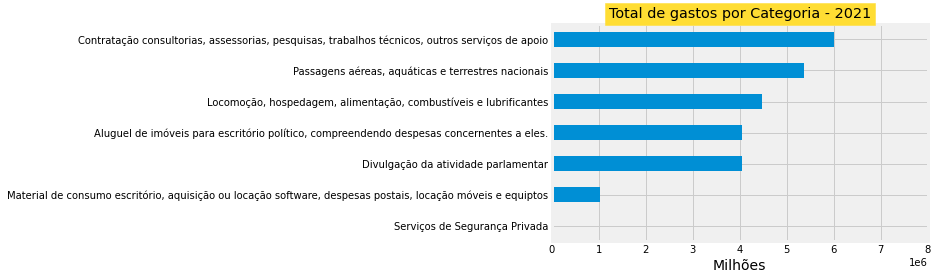

In [53]:
#Quais os valores totais de reembolso por "TIPO DESPESA" em 2021?
#2021
df_2021 = df_ceaps_18_21[df_ceaps_18_21['ANO']==2021]
df_2021.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=True).plot.barh()
plt.xlim(0,8000000)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Milhões', fontsize=14)
plt.title('Total de gastos por Categoria - 2021', backgroundcolor='#FFDD33')
plt.ylabel('')

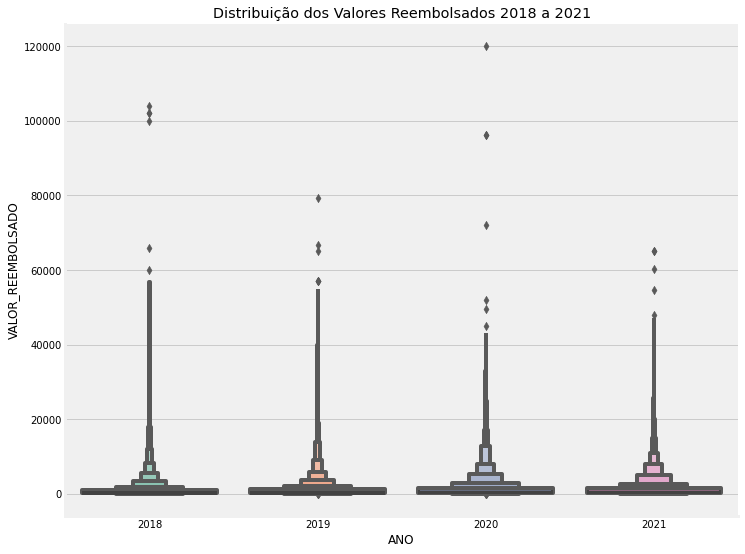

In [54]:
#Distribuição dos Valores Reembolsados entre 2018 a 2021
sns.catplot(x="ANO", y="VALOR_REEMBOLSADO", kind='boxen', palette="Set2", data=df_ceaps_18_21)
plt.title("Distribuição dos Valores Reembolsados 2018 a 2021")
plt.gcf().set_size_inches(12, 8)

In [58]:
#Salvando o DataFrame em csv
df_ceaps_18_21.to_csv('df_ceaps_18_21.csv', index=False)

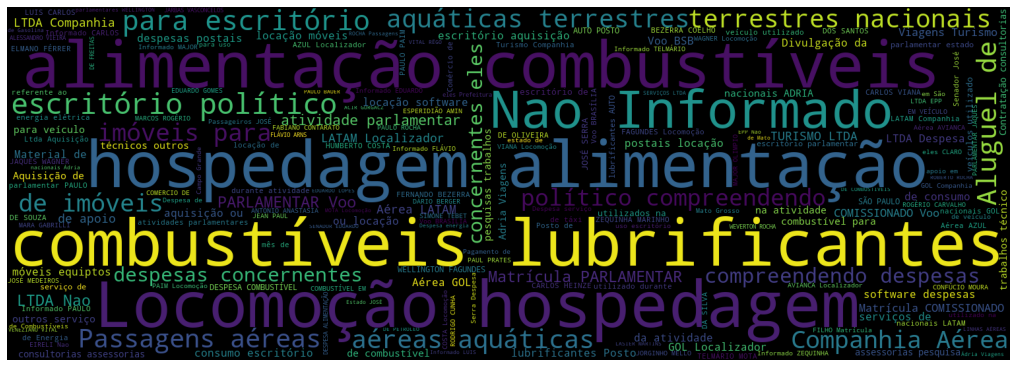

In [59]:
from matplotlib import text
#Quais palavras chaves mais frequentes no dataset?
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = open("df_ceaps_18_21.csv", encoding='utf-8').read()
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(text)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()